In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import optuna

In [2]:
df=pd.read_csv("../data/final_dataset_for_Churn_Prediction.csv")
df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,tenure,MonthlyCharges,TotalCharges,tenure^2,tenure MonthlyCharges,tenure TotalCharges,MonthlyCharges^2,MonthlyCharges TotalCharges,TotalCharges^2,Churn
0,0,0,0,1,0,0,0,0,0,0,...,-0.007234,-0.211313,-0.148576,-0.343208,-0.164015,-0.351472,-0.450832,-0.321498,-0.396080,0
1,0,0,0,1,1,0,0,0,0,0,...,-1.290081,-0.312803,-0.963013,-0.966306,-0.968552,-0.770122,-0.541398,-0.770459,-0.626475,1
2,0,0,0,0,0,1,0,0,0,0,...,0.433744,-0.690937,-0.170864,0.126819,-0.178446,-0.229913,-0.834215,-0.452694,-0.407854,0
3,0,0,0,1,1,0,0,1,0,0,...,-1.290081,0.238846,-0.943125,-0.966306,-0.953724,-0.769553,0.011964,-0.748855,-0.625743,1
4,0,0,0,1,1,0,1,1,0,0,...,-1.049547,1.186634,-0.637325,-0.933853,-0.665189,-0.728617,1.312302,-0.435496,-0.583645,1


In [3]:
X=df.drop("Churn",axis=1)
y=df["Churn"]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=10)

In [126]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred=model_lr.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1090
           1       0.79      0.82      0.80       556

    accuracy                           0.86      1646
   macro avg       0.85      0.85      0.85      1646
weighted avg       0.87      0.86      0.87      1646



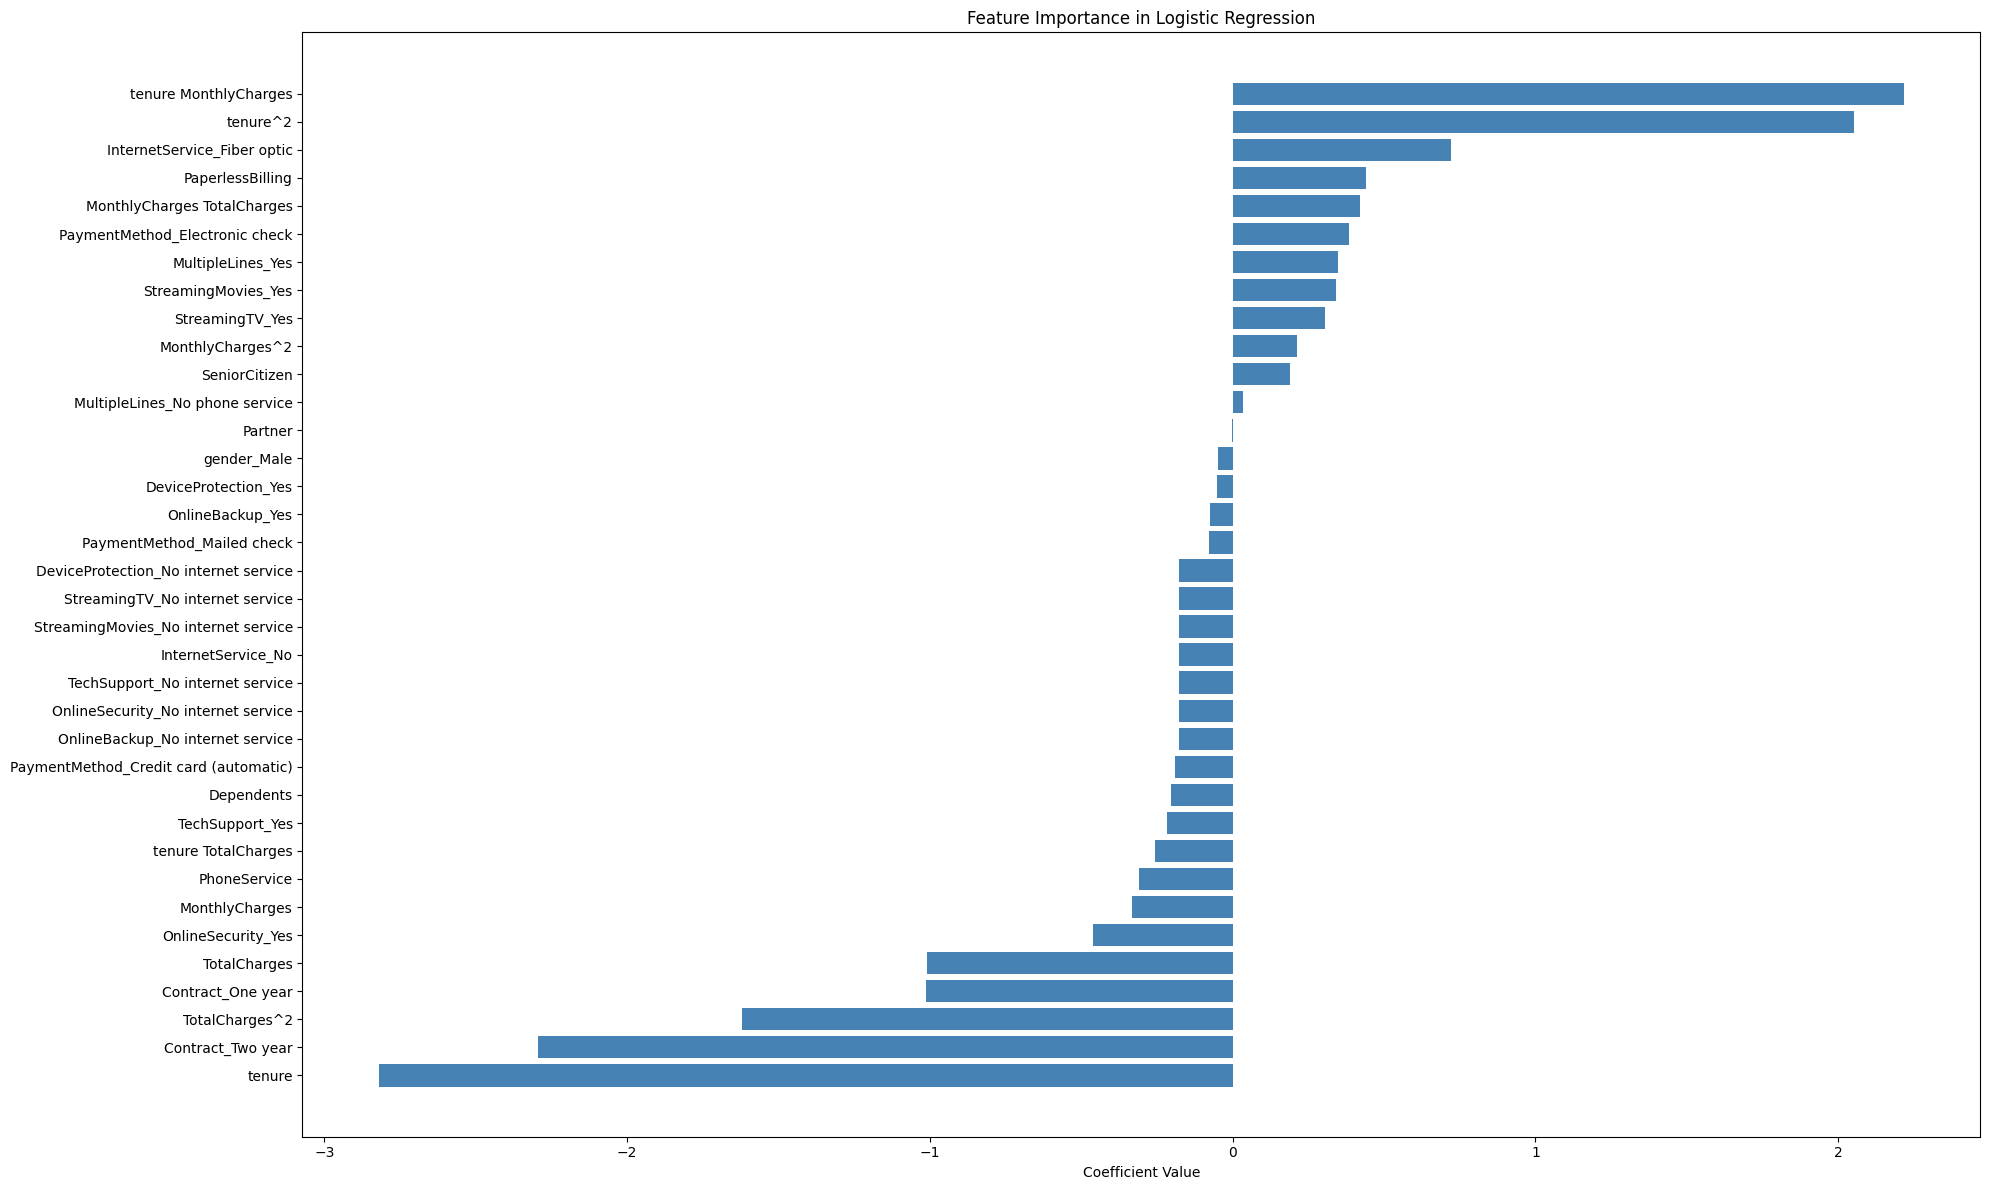

In [127]:
feature_importance = model_lr.coef_.flatten()

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': feature_importance
})

# Sort for visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

# Plot
plt.figure(figsize=(20, 12))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.tight_layout()
plt.show()

In [11]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred=model_rf.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1090
           1       0.79      0.80      0.79       556

    accuracy                           0.86      1646
   macro avg       0.84      0.84      0.84      1646
weighted avg       0.86      0.86      0.86      1646



In [12]:
from sklearn.metrics import accuracy_score
def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical(
            "max_features", ["sqrt", "log2", None]
        ),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return acc


In [13]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2026-01-02 16:39:56,498] A new study created in memory with name: no-name-be3e0fbb-6fe2-4763-945d-1f2069cec77c
[I 2026-01-02 16:39:58,979] Trial 0 finished with value: 0.8608748481166464 and parameters: {'n_estimators': 618, 'max_depth': 21, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.8608748481166464.
[I 2026-01-02 16:40:02,411] Trial 1 finished with value: 0.8128797083839611 and parameters: {'n_estimators': 684, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.8608748481166464.
[I 2026-01-02 16:40:03,031] Trial 2 finished with value: 0.8341433778857837 and parameters: {'n_estimators': 103, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.8608748481166464.
[I 2026-01-02 16:40:03,495] Trial 3 finished with value: 0.8645200486026732 a

In [14]:
model_rf = RandomForestClassifier(**study.best_params)
model_rf.fit(X_train, y_train)
y_pred=model_rf.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1090
           1       0.79      0.81      0.80       556

    accuracy                           0.86      1646
   macro avg       0.85      0.85      0.85      1646
weighted avg       0.87      0.86      0.86      1646



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_lr = DecisionTreeClassifier()

bagging_lr = BaggingClassifier(
    estimator=base_lr,
    n_estimators=50,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    random_state=42,
    n_jobs=-1
)
bagging_lr.fit(X_train, y_train)
y_pred = bagging_lr.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1090
           1       0.78      0.78      0.78       556

    accuracy                           0.85      1646
   macro avg       0.84      0.84      0.84      1646
weighted avg       0.85      0.85      0.85      1646



In [19]:
def objective(trial):

    # -------- Base Decision Tree params --------
    base_params = {
        "max_depth": trial.suggest_int("max_depth", 2, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "random_state": 42
    }

    base_tree = DecisionTreeClassifier(**base_params)

    # -------- Bagging params --------
    bagging_params = {
        "estimator": base_tree,
        "n_estimators": trial.suggest_int("n_estimators", 20, 200),
        "max_samples": trial.suggest_float("max_samples", 0.5, 1.0),
        "max_features": trial.suggest_float("max_features", 0.5, 1.0),
        "bootstrap": True,
        "bootstrap_features": False,
        "n_jobs": -1,
        "random_state": 42
    }

    model = BaggingClassifier(**bagging_params)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    return acc


In [20]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)


[I 2026-01-02 16:45:55,433] A new study created in memory with name: no-name-de62def7-a6c5-4ab4-ad1c-bcd17d810e9c
[I 2026-01-02 16:45:55,693] Trial 0 finished with value: 0.8675577156743621 and parameters: {'max_depth': 27, 'min_samples_split': 9, 'min_samples_leaf': 10, 'criterion': 'entropy', 'n_estimators': 41, 'max_samples': 0.5694063831586627, 'max_features': 0.5227572882103386}. Best is trial 0 with value: 0.8675577156743621.
[I 2026-01-02 16:45:56,441] Trial 1 finished with value: 0.8712029161603888 and parameters: {'max_depth': 22, 'min_samples_split': 17, 'min_samples_leaf': 10, 'criterion': 'entropy', 'n_estimators': 182, 'max_samples': 0.7759811331052515, 'max_features': 0.9000207157513875}. Best is trial 1 with value: 0.8712029161603888.
[I 2026-01-02 16:45:56,674] Trial 2 finished with value: 0.8626974483596598 and parameters: {'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 5, 'criterion': 'entropy', 'n_estimators': 20, 'max_samples': 0.595811689257031, 'max_f

In [21]:
print("Best Accuracy:", study.best_value)
print("Best Parameters:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")


Best Accuracy: 0.8742405832320778
Best Parameters:
max_depth: 28
min_samples_split: 18
min_samples_leaf: 6
criterion: entropy
n_estimators: 120
max_samples: 0.6103958864450774
max_features: 0.9336652921512286


In [22]:
best_base_tree = DecisionTreeClassifier(
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    criterion=study.best_params["criterion"],
    random_state=42
)

best_bagging = BaggingClassifier(
    estimator=best_base_tree,
    n_estimators=study.best_params["n_estimators"],
    max_samples=study.best_params["max_samples"],
    max_features=study.best_params["max_features"],
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=42
)

best_bagging.fit(X_train, y_train)

y_pred = best_bagging.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1090
           1       0.79      0.85      0.82       556

    accuracy                           0.87      1646
   macro avg       0.86      0.87      0.86      1646
weighted avg       0.88      0.87      0.88      1646



In [23]:
from xgboost import XGBClassifier

In [26]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred=model_xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1090
           1       0.77      0.77      0.77       556

    accuracy                           0.84      1646
   macro avg       0.83      0.83      0.83      1646
weighted avg       0.84      0.84      0.84      1646



In [27]:
def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "objective": "multi:softmax" if len(set(y_train)) > 2 else "binary:logistic",
        "eval_metric": "mlogloss" if len(set(y_train)) > 2 else "logloss",
        "random_state": 42,
        "n_jobs": -1,
        "tree_method": "hist"
    }

    model = XGBClassifier(**params)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return acc
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2026-01-02 16:50:55,144] A new study created in memory with name: no-name-547a947f-e119-43b8-ad06-63631d924298
[I 2026-01-02 16:50:55,480] Trial 0 finished with value: 0.8608748481166464 and parameters: {'n_estimators': 510, 'max_depth': 5, 'learning_rate': 0.12744183731856507, 'subsample': 0.8953286923470376, 'colsample_bytree': 0.9312213714363814, 'gamma': 0.7959166461246708, 'min_child_weight': 1, 'reg_alpha': 0.1380839170239606, 'reg_lambda': 3.0212731212203052}. Best is trial 0 with value: 0.8608748481166464.
[I 2026-01-02 16:50:55,641] Trial 1 finished with value: 0.8693803159173754 and parameters: {'n_estimators': 248, 'max_depth': 11, 'learning_rate': 0.28561155679498457, 'subsample': 0.8687521285030871, 'colsample_bytree': 0.6485080422750362, 'gamma': 3.9875769433908244, 'min_child_weight': 8, 'reg_alpha': 1.749371717028101, 'reg_lambda': 3.7479305851502485}. Best is trial 1 with value: 0.8693803159173754.
[I 2026-01-02 16:50:55,769] Trial 2 finished with value: 0.871810449

In [46]:
study.best_params

{'n_estimators': 702,
 'max_depth': 4,
 'learning_rate': 0.09246649088731493,
 'subsample': 0.8558079045372498,
 'colsample_bytree': 0.9127069508483029,
 'gamma': 2.4546805791993926,
 'min_child_weight': 2,
 'reg_alpha': 0.35774189737033285,
 'reg_lambda': 2.541694773004607}

In [62]:
model_xgb=XGBClassifier(**study.best_params)
model_xgb.fit(X_train,y_train)
y_pred=model_xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1090
           1       0.79      0.84      0.82       556

    accuracy                           0.87      1646
   macro avg       0.85      0.86      0.86      1646
weighted avg       0.87      0.87      0.87      1646



In [42]:
probabilities = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probabilities)
desired_recall = 0.9
closest_index = np.argmin(abs(tpr - desired_recall))
y_pred = (probabilities >= threshold[closest_index]).astype(int)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1090
           1       0.75      0.90      0.81       556

    accuracy                           0.86      1646
   macro avg       0.84      0.87      0.85      1646
weighted avg       0.88      0.86      0.86      1646



In [44]:
probabilities = model_lr.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probabilities)
desired_recall = 0.9
closest_index = np.argmin(abs(tpr - desired_recall))
y_pred = (probabilities >= threshold[closest_index]).astype(int)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1090
           1       0.72      0.90      0.80       556

    accuracy                           0.85      1646
   macro avg       0.83      0.86      0.84      1646
weighted avg       0.87      0.85      0.85      1646



In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

# Train -sma model
model_lr_sm=LogisticRegression()
model_lr_sm.fit(X_train_sm, y_train_sm)
probabilities = model_lr_sm.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probabilities)
desired_recall = 0.9
closest_index = np.argmin(abs(tpr - desired_recall))
y_pred = (probabilities >= threshold[closest_index]).astype(int)
# y_pred=model_lr_sm.predict(X_test)
print(classification_report(y_test,y_pred))

Before SMOTE: Churn
0    2539
1    1301
Name: count, dtype: int64
After SMOTE: Churn
1    2539
0    2539
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1090
           1       0.72      0.90      0.80       556

    accuracy                           0.85      1646
   macro avg       0.83      0.86      0.84      1646
weighted avg       0.87      0.85      0.85      1646



In [65]:
probabilities_lr_sm =model_lr_sm.predict_proba(X)
probabilities_lr_sm

array([[0.91647777, 0.08352223],
       [0.4439087 , 0.5560913 ],
       [0.90509108, 0.09490892],
       ...,
       [0.37665903, 0.62334097],
       [0.16248839, 0.83751161],
       [0.96948606, 0.03051394]])

In [66]:
probabilities_xgb=model_xgb.predict_proba(X)
probabilities_xgb

array([[0.9673919 , 0.03260811],
       [0.25456125, 0.74543875],
       [0.9481542 , 0.0518458 ],
       ...,
       [0.5866035 , 0.41339648],
       [0.16006655, 0.83993345],
       [0.99535197, 0.00464801]], dtype=float32)

In [67]:
probabilities_dt_bg=best_bagging.predict_proba(X)
probabilities_dt_bg

array([[0.9796823 , 0.0203177 ],
       [0.21296729, 0.78703271],
       [0.91976876, 0.08023124],
       ...,
       [0.53733957, 0.46266043],
       [0.26100986, 0.73899014],
       [1.        , 0.        ]])

In [81]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

poly = PolynomialFeatures(degree=2, include_bias=False)

# LR probabilities
prob_lr_df = pd.DataFrame(
    probabilities_lr_sm,
    columns=["LogisticRegression_0", "LogisticRegression_1"]
)

prob_lr_poly = poly.fit_transform(prob_lr_df)

lr_poly_feature_names = poly.get_feature_names_out(prob_lr_df.columns)

prob_lr_poly_df = pd.DataFrame(
    prob_lr_poly,
    columns=lr_poly_feature_names,
    index=prob_lr_df.index
)
prob_dt_bg_df = pd.DataFrame(
    probabilities_dt_bg,
    columns=["DecisionTreeWithBagging_0", "DecisionTreeWithBagging_1"]
)

prob_dt_bg_poly = poly.fit_transform(prob_dt_bg_df)

dt_poly_cols = poly.get_feature_names_out(prob_dt_bg_df.columns)

prob_dt_bg_poly_df = pd.DataFrame(
    prob_dt_bg_poly,
    columns=dt_poly_cols,
    index=prob_dt_bg_df.index
)
prob_xgb_df = pd.DataFrame(
    probabilities_xgb,
    columns=["XGBClassifier_0", "XGBClassifier_1"]
)

prob_xgb_poly = poly.fit_transform(prob_xgb_df)

xgb_poly_cols = poly.get_feature_names_out(prob_xgb_df.columns)

prob_xgb_poly_df = pd.DataFrame(
    prob_xgb_poly,
    columns=xgb_poly_cols,
    index=prob_xgb_df.index
)
X2 = pd.concat(
    [
        prob_lr_poly_df,
        prob_dt_bg_poly_df,
        prob_xgb_poly_df
    ],
    axis=1
)
X2


,LogisticRegression_0,LogisticRegression_1,LogisticRegression_0^2,LogisticRegression_0 LogisticRegression_1,LogisticRegression_1^2,DecisionTreeWithBagging_0,DecisionTreeWithBagging_1,DecisionTreeWithBagging_0^2,DecisionTreeWithBagging_0 DecisionTreeWithBagging_1,DecisionTreeWithBagging_1^2,XGBClassifier_0,XGBClassifier_1,XGBClassifier_0^2,XGBClassifier_0 XGBClassifier_1,XGBClassifier_1^2
0,0.916478,0.083522,0.839932,0.076546,0.006976,0.979682,0.020318,0.959777,0.019905,4.128091e-04,0.967392,0.032608,0.935847,0.031545,0.001063
1,0.443909,0.556091,0.197055,0.246854,0.309238,0.212967,0.787033,0.045355,0.167612,6.194205e-01,0.254561,0.745439,0.064801,0.189760,0.555679
2,0.905091,0.094909,0.819190,0.085901,0.009008,0.919769,0.080231,0.845975,0.073794,6.437052e-03,0.948154,0.051846,0.898996,0.049158,0.002688
3,0.061830,0.938170,0.003823,0.058007,0.880163,0.168098,0.831902,0.028257,0.139841,6.920610e-01,0.117314,0.882686,0.013763,0.103552,0.779134
4,0.040959,0.959041,0.001678,0.039281,0.919759,0.017332,0.982668,0.000300,0.017032,9.656365e-01,0.058908,0.941092,0.003470,0.055438,0.885654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,0.886438,0.113562,0.785773,0.100666,0.012896,0.778359,0.221641,0.605842,0.172516,4.912491e-02,0.765670,0.234330,0.586250,0.179419,0.054911
5482,0.945117,0.054883,0.893246,0.051871,0.003012,0.999306,0.000694,0.998612,0.000694,4.822531e-07,0.987213,0.012787,0.974590,0.012623,0.000164
5483,0.376659,0.623341,0.141872,0.234787,0.388554,0.537340,0.462660,0.288734,0.248606,2.140547e-01,0.586604,0.413396,0.344104,0.242500,0.170897
5484,0.162488,0.837512,0.026402,0.136086,0.701426,0.261010,0.738990,0.068126,0.192884,5.461064e-01,0.160067,0.839933,0.025621,0.134445,0.705488


In [82]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y,test_size=0.3,random_state=10)
stack_model=XGBClassifier()
stack_model.fit(X2_train,y2_train)
y_pred=stack_model.predict(X2_test)
print(classification_report(y2_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1090
           1       0.74      0.72      0.73       556

    accuracy                           0.82      1646
   macro avg       0.80      0.79      0.80      1646
weighted avg       0.82      0.82      0.82      1646



In [83]:
def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "objective": "multi:softmax" if len(set(y_train)) > 2 else "binary:logistic",
        "eval_metric": "mlogloss" if len(set(y_train)) > 2 else "logloss",
        "random_state": 42,
        "n_jobs": -1,
        "tree_method": "hist"
    }

    model = XGBClassifier(**params)

    model.fit(X2_train, y2_train)

    y_pred = model.predict(X2_test)
    acc = accuracy_score(y2_test, y_pred)

    return acc
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2026-01-02 17:38:53,856] A new study created in memory with name: no-name-ebaba139-8ead-49b9-b4e9-e275307f4c68
[I 2026-01-02 17:38:53,941] Trial 0 finished with value: 0.8402187120291617 and parameters: {'n_estimators': 191, 'max_depth': 12, 'learning_rate': 0.10200232161973703, 'subsample': 0.833851383912414, 'colsample_bytree': 0.9994839072096702, 'gamma': 2.668816186861942, 'min_child_weight': 3, 'reg_alpha': 2.7067595426992015, 'reg_lambda': 1.0928203216081178}. Best is trial 0 with value: 0.8402187120291617.
[I 2026-01-02 17:38:53,998] Trial 1 finished with value: 0.8420413122721749 and parameters: {'n_estimators': 118, 'max_depth': 11, 'learning_rate': 0.19416762819263056, 'subsample': 0.829044624305072, 'colsample_bytree': 0.7577235212756557, 'gamma': 2.2645743226949984, 'min_child_weight': 5, 'reg_alpha': 2.0847806942281673, 'reg_lambda': 4.846991797487073}. Best is trial 1 with value: 0.8420413122721749.
[I 2026-01-02 17:38:54,136] Trial 2 finished with value: 0.84750911300

In [84]:
model = XGBClassifier(**study.best_params)

model.fit(X2_train, y2_train)

y_proba = model.predict_proba(X2_test)

In [85]:
from sklearn.metrics import roc_auc_score, f1_score

roc_auc = roc_auc_score(y_test, y_proba[:, 1])
f1 = f1_score(y_test, y_pred)


In [95]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report

calibrated_xgb = CalibratedClassifierCV(
    estimator=model,
    method="isotonic",
    cv=10
)

calibrated_xgb.fit(X2_train, y_train)

y_pred = calibrated_xgb.predict(X2_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1090
           1       0.79      0.78      0.79       556

    accuracy                           0.86      1646
   macro avg       0.84      0.84      0.84      1646
weighted avg       0.86      0.86      0.86      1646



# Export Model

In [134]:
coef = model_lr.coef_.flatten()        # shape (n_features,)
intercept = model.intercept_[0]
feature_names = X_train.columns.tolist()

In [136]:
import joblib
lr_artifact = {
    "coefficients": coef,
    "intercept": intercept,
    "features": feature_names,
}

joblib.dump(lr_artifact, "../artifacts/logistic_regression_coefficients.joblib")

['../artifacts/logistic_regression_coefficients.joblib']